# TOC

 - [Introduction](0-introduction.ipynb)
 - [Simple Example](1-simple-example.ipynb)
 - [Simple Example Symbolic](2-simple-example-symblic.ipynb)
 - [Pythonic MOA Array Interface](3-lazy-arrays.ipynb)
 - [Benchmarks](4-benchmarks.ipynb)

# MOA "Array Interface"

This is very much a work in progress. I want to see how far a python wrapper around a moa interface will take us. Everything can change since this is just a wrapper that generates an AST.

In [1]:
from moa.frontend import LazyArray

In [2]:
A = LazyArray(name='A', shape=(3, 2))
B = LazyArray(name='B', shape=(4,))
C = LazyArray(name='C', shape=(3, 4))

expression = (((A.T)[0] - 1).outer('*', B) + C + 'n').transpose([1, 0])[0]

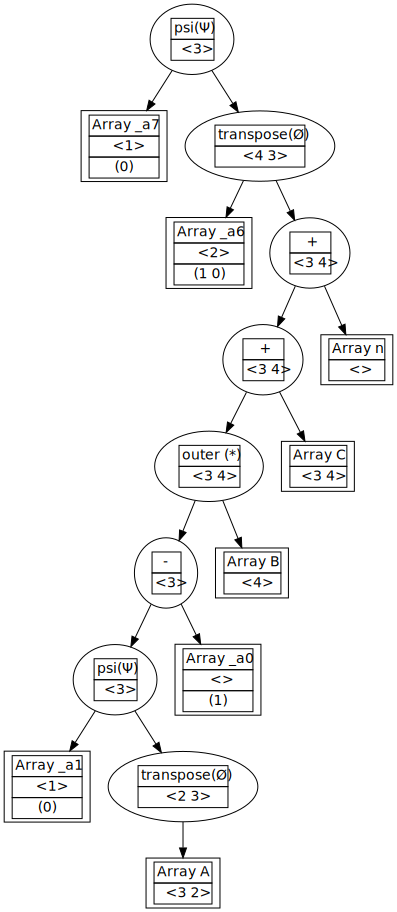

In [3]:
expression.visualize('shape')

In [4]:
print(expression.analysis())

{'unoptimized_flops': 39, 'optimized_flops': 12}


In [5]:
print(expression.compile())



def f(A, B, C, n):
    
    
    if (not ((len(n.shape) == 0) and ((len(C.shape) == 2) and ((len(B.shape) == 1) and (len(A.shape) == 2))))):
        
        raise Exception('arguments have invalid dimension')
    
    if (not ((4 == C.shape[1]) and ((3 == C.shape[0]) and ((4 == B.shape[0]) and ((2 == A.shape[1]) and (3 == A.shape[0])))))):
        
        raise Exception('arguments do not match declared shape')
    
    _a30 = Array((3,))
    
    for _i8 in range(0, 3, 1):
        
        _a30[(_i8,)] = ((((A[(_i8, 0)] - 1) * B[(0,)]) + C[(_i8, 0)]) + n)
    return _a30


In [6]:
from moa.array import Array

A = Array(shape=(3, 2), value=(1, 2, 3, 4, 5, 6))
B = Array(shape=(4,), value=(13, 14, 15, 16))
C = Array(shape=(3, 4), value=(17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28))
n = Array(shape=(), value=(4,))

exec(expression.compile())

D = f(A=A, B=B, C=C, n=n)

print('shape', D.shape)
print('value', D.value)

shape (3,)
value [21, 51, 81]
